# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:00:29.354466+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

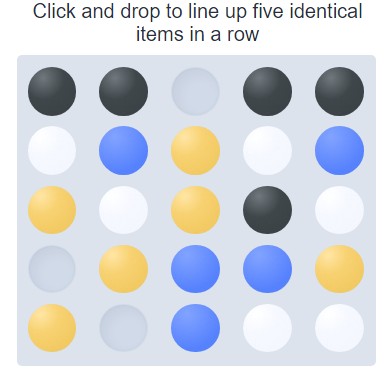

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "Text instruction: 'Click and drop to line up five identical items in a row'.")
    describe(1, "A grid of colored circles with black, blue, yellow, and white colors arranged in rows and columns.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides the task instructions for interacting with the grid in Frame 1.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click and drag circles in the grid to align five identical circles in a row, either horizontally, vertically, or diagonally.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0 provides instructions, so it is non-interactable
    # Frame 1 contains the grid of colored circles

    # Access Frame 1
    frame1 = frames[1]

    # Convert Frame 1 into a grid of swappable elements
    grid_elements = frame1.grid(tiles=25)  # Assuming a 5x5 grid

    # Set each element in the grid as SWAPPABLE
    for row in grid_elements:
        for element in row:
            element.set_element_as(interactable="SWAPPABLE")

## Solution Composition

In [ ]:
def stage3(frames):
    # Explore all possible swaps in Frame 1
    choices = explore(frames[1])

    # Iterate over each swap choice
    for choice in choices:
        grid = choice.grid
        
        # Check each row for five identical elements
        for row in grid:
            if all(match(row[0], element) for element in row):
                choice.swap()
                return

        # Check each column for five identical elements
        for col in zip(*grid):
            if all(match(col[0], element) for element in col):
                choice.swap()
                return

        # Check diagonals for five identical elements
        if all(match(grid[i][i], grid[0][0]) for i in range(len(grid))):
            choice.swap()
            return
        if all(match(grid[i][len(grid)-i-1], grid[0][len(grid)-1]) for i in range(len(grid))):
            choice.swap()
            return